<b>1.</b> This example uses the model where the entries of each column are iid draws of a binomial $B(2, p_i)$ random variable where $p_i$ comes from a distribution $f(p) \sim p^{-1} \mathbb{1}_{p_0 < p < p_1}$.  Here we use a lower cut-off $p_0 =0.01$ and upper cut-off $0.2$ with correct aspect ratio $N/M = 2.5$.  Moreover, we center and scale by the empirical means $\hat{p}$ estimated for each column independently.  For such a dense matrix, we see that a square-root emerges.  

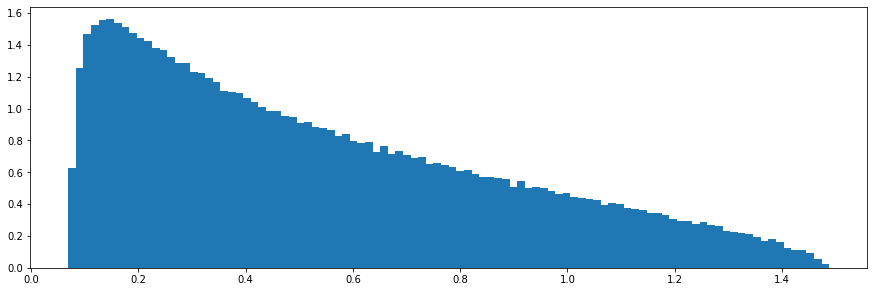

[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import imp
import main
imp.reload(main)

N=2500
M = 1000
p0 = 0.01
p1 = 0.2
S, ms = main.power(N, M, p0, p1=p1, emp=True)
S = S[1:len(S)]
for i in range(50):
    Snew, msnew = main.power(N, M, p0, emp=True)
    Snew = Snew[1:len(Snew)]
    S = np.append(S, Snew)
    ms = np.append(ms, msnew)
fig, ax = plt.subplots(figsize=(15,4.8))
ax.hist(S, bins=100, density=True)
plt.show()
print(ms)

<b>2.)</b> Much sparser matrix with correct aspect ratio.  This was on the previous page of simulations as well.  The tail only seems to emerge when the matrix is very sparse, much less sparse than what is in the data.


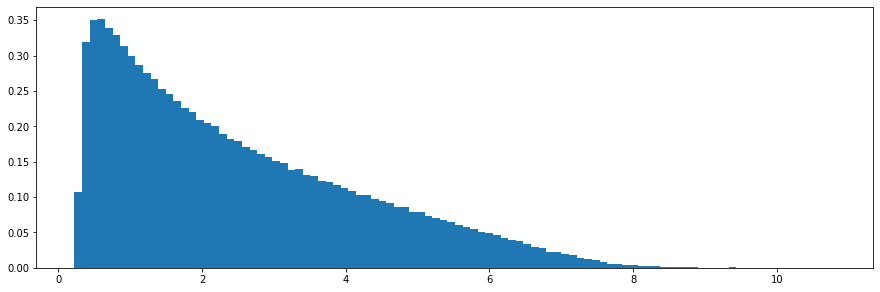

In [28]:
N=500
M = 1250
p0 = 0.8/N
p1 = 0.01
S= main.power(N, M, p0, emp=False, k=2)
#S=S[1:len(S)]
for i in range(250):
    Snew = main.power(N, M, p0, emp=False)
    #Snew = Snew[1:len(Snew)]
    S = np.append(S, Snew)
fig, ax = plt.subplots(figsize=(15,4.8))
ax.hist(S, bins=100, density=True)
plt.show()

Now we do a few experiments with Gaussian matrices, using covariance profiles that have a tail which vanishes in some way or another.

<b>3.)</b> Gaussian matrix, with limiting covariance matrix having a tail like (a rescaling of) $(t-1)^{-0.8} \mathbb{1}_{1<t<2}$  Still a little bumpy, as the density doesn't vanish at the right edge $t=2$.

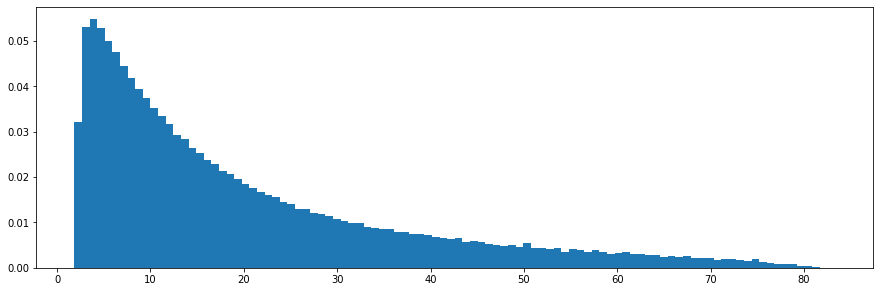

In [84]:
imp.reload(main)
N = 500
M = 1250
m = 1200
var = np.random.uniform(size=m)
var = np.abs(var)
var = var*var*var*var*var
var = var / np.max(var)
var = var*4.0
var = np.append(np.ones(M-m), var+1.0)
#var = np.abs(var)
var = var + 1.0
S = main.generalWishart(N, M, var)
for i in range(100):
    S = np.append(S, main.generalWishart(N, M, var))
fig, ax = plt.subplots(figsize=(15,4.8))
ax.hist(S, bins=100, density=True)
plt.show()


<b>4.)</b> Gaussian matrix with limiting covariance matrix eigenvalues having a density vanishing like a power law $x^n$ for $n=9$.  Now we are seeing a nice power law tail emerging.

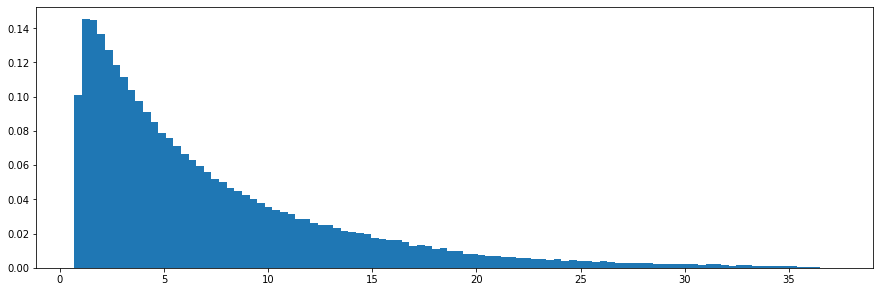

In [6]:
import numpy as np
import imp
import main
import matplotlib.pyplot as plt

imp.reload(main)
N = 1250
M = 500
m = 400
n=10.0
var = np.random.uniform(size=m)
var = np.abs(var)
var = np.power(var, 1.0/n)
var = 1-var
var = var*8.0
var = np.append(np.ones(M-m), var+1.0)
#var = np.abs(var)
var = var + 1.0
S = main.generalWishart(N, M, var)
for i in range(100):
    S = np.append(S, main.generalWishart(N, M, var))
fig, ax = plt.subplots(figsize=(15,4.8))
ax.hist(S, bins=100, density=True)
plt.show()

<b> 5.)</b> In this experiment we fix a covariance profile but look at what happens when we change the aspect ratio by a factor of $\frac{1}{2}$.  The second and fourth graphs display the top 10% of eigenvalues in each of the previous plots.  Note that when we cut the aspect ratio, it does look a little more concave.

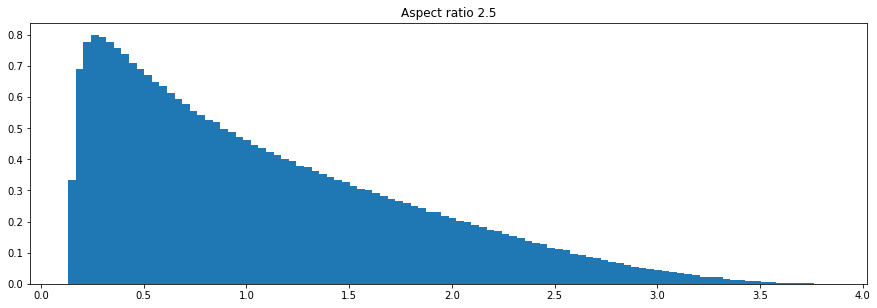

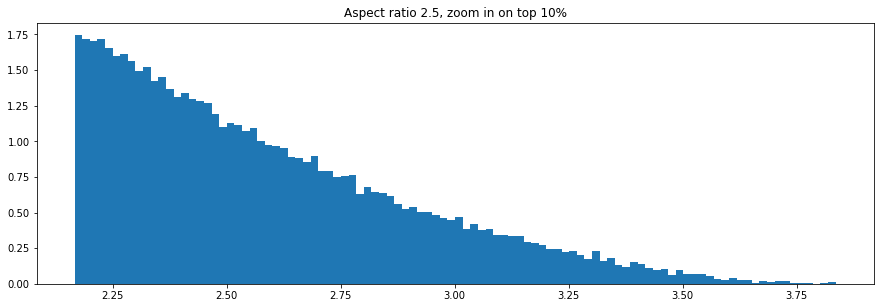

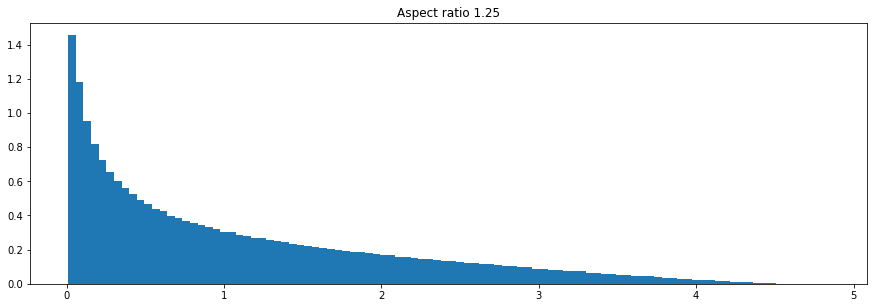

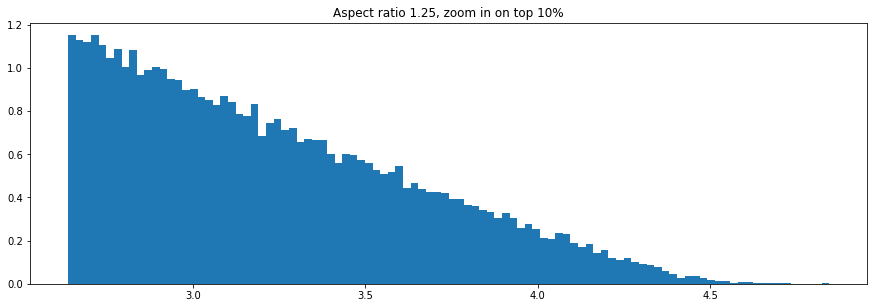

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import imp
import main

N=1250
M= 500
m = 100
n=3.0
var = np.random.uniform(size=m)
var = np.abs(var)
var = np.power(var, 1.0/n)
var = 1-var
var = var*0.7
var = np.append(np.ones(M-m), var+1.0)

S = main.generalWishart(N, M, var)
for i in range(500):
    var = np.random.uniform(size=m)
    var = np.abs(var)
    var = np.power(var, 1.0/n)
    var = 1-var
    var = var*0.75
    var = np.append(np.ones(M-m), var+1.0)
    Snew = main.generalWishart(N, M, var)
    S = np.append(S, Snew)
B = np.sort(S)[int(len(S)*0.9):len(S)]
fig, ax = plt.subplots(figsize=(15,4.8))
ax.hist(S, bins=100, density=True)
ax.set_title('Aspect ratio 2.5')
plt.show()
fig, ax = plt.subplots(figsize=(15,4.8))
ax.hist(B, bins=100, density=True)
ax.set_title('Aspect ratio 2.5, zoom in on top 10%')
plt.show()

N=625
S = main.generalWishart(N, M, var)
for i in range(500):
    var = np.random.uniform(size=m)
    var = np.abs(var)
    var = np.power(var, 1.0/n)
    var = 1-var
    var = var*0.75
    var = np.append(np.ones(M-m), var+1.0)
    Snew = main.generalWishart(N, M, var)
    S = np.append(S, Snew)
B = np.sort(S)[int(len(S)*0.9):len(S)]
fig, ax = plt.subplots(figsize=(15,4.8))
ax.hist(S, bins=100, density=True)
ax.set_title('Aspect ratio 1.25')
plt.show()

fig, ax = plt.subplots(figsize=(15,4.8))
ax.hist(B, bins=100, density=True)
ax.set_title('Aspect ratio 1.25, zoom in on top 10%')
plt.show()


6.) Just recall what the usual MP distribution at aspect ratio $\phi = M/N = (2.5)^{-1}$ looks like

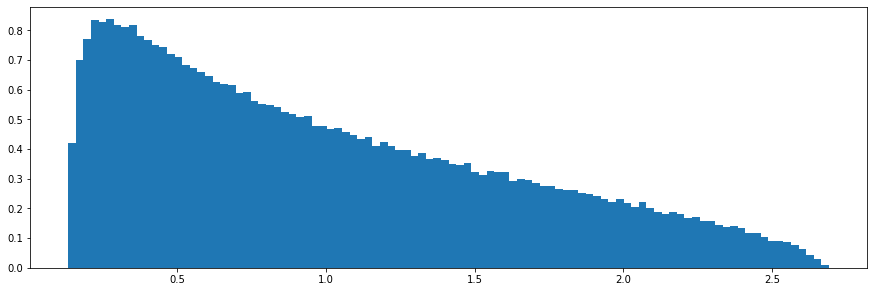

In [12]:
N = 1250
M = 500
var = np.random.normal(size=M)
var = var / (np.max(var) - np.min(var))*0.0001
var = var + 1.0
S = main.generalWishart(N, M, var)
for i in range(90):
    S = np.append(S, main.generalWishart(N, M, var))
fig, ax = plt.subplots(figsize=(15,4.8))
ax.hist(S, bins=100, density=True)
plt.show()
